In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay,
    r2_score,
    precision_recall_curve
)


/Users/mahesh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
data=pd.read_csv('creditcard.csv')


In [3]:
data.shape

(284807, 31)

In [4]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:

print("Number of duplicate rows:", data.duplicated().sum())

data = data.drop_duplicates()

print("Number of duplicate rows after dropping:", data.duplicated().sum())


Number of duplicate rows: 1081
Number of duplicate rows after dropping: 0


In [9]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

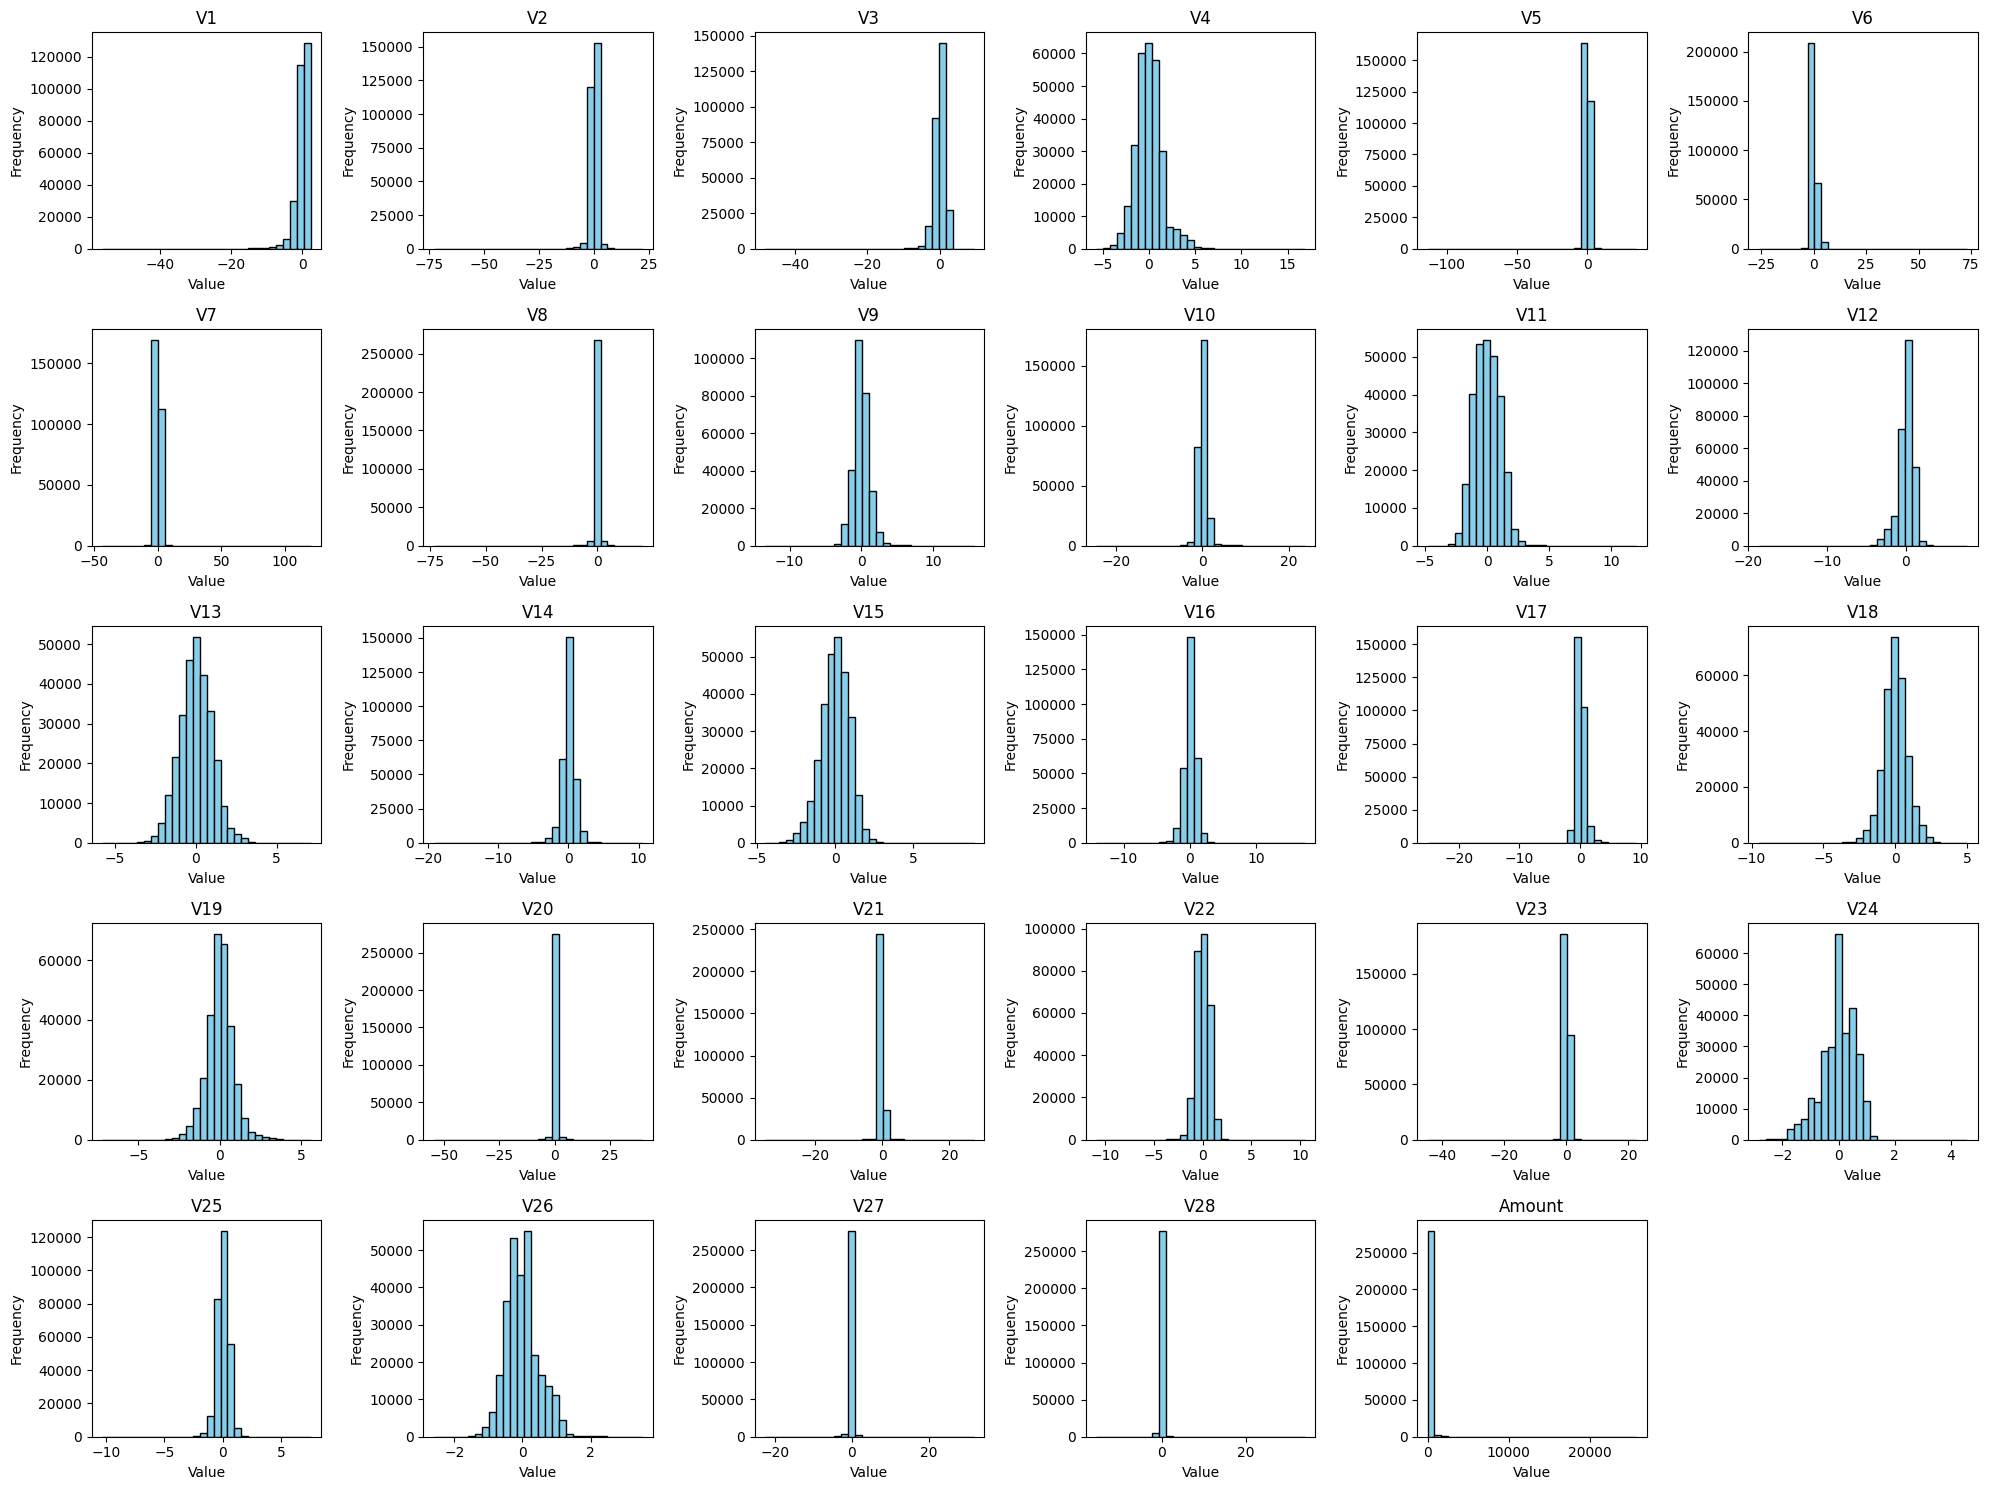

In [10]:
import matplotlib.pyplot as plt


features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
            'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
            'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 6, i)  
    plt.hist(data[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()  
plt.show()


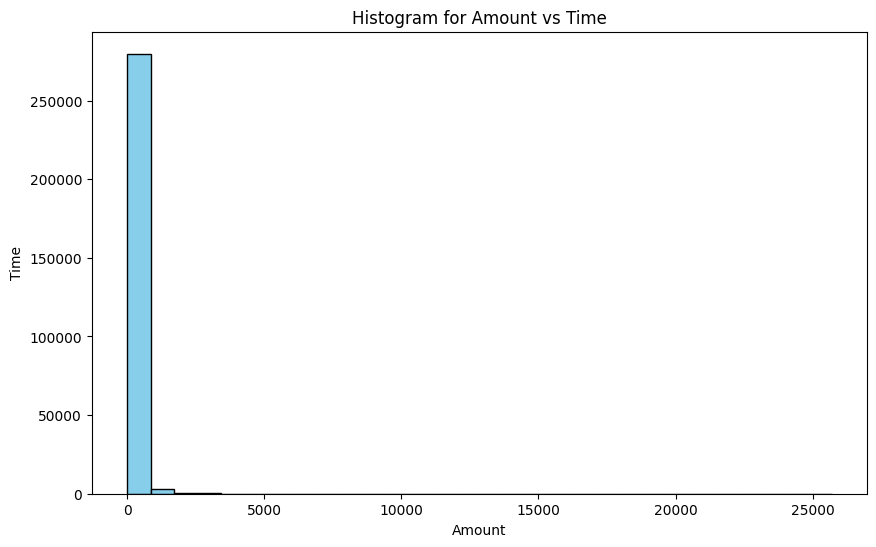

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(data['Amount'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Histogram for Amount vs Time')
plt.show()


In [12]:
data=data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
fraud_trans=data[data['Class'] == 1]
non_fraud=data[data['Class'] == 0]

In [14]:
fraud_trans.shape

(473, 30)

In [15]:
non_fraud.shape

(283253, 30)

In [16]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
data['norm_data'] = scale.fit_transform(data[['Amount']])
data = data.drop(['Amount'], axis=1)
print(data)


               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V21       V22  \
0       0.239599  0.098698  0.363787  0.090794  ... -0.01830

In [17]:
X=data.drop('Class',axis=1)
y=data['Class']


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
rf_classifi=RandomForestClassifier(n_estimators=100)
rf_classifi.fit(X_train,y_train)



RandomForestClassifier()

In [44]:
y_pred=rf_classifi.predict(X_test)



In [45]:

accuracy = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)




Accuracy: 0.9995418179254926
Precision: 0.9705882352941176
Recall: 0.7333333333333333
F1 Score: 0.8354430379746836


<Figure size 600x600 with 0 Axes>

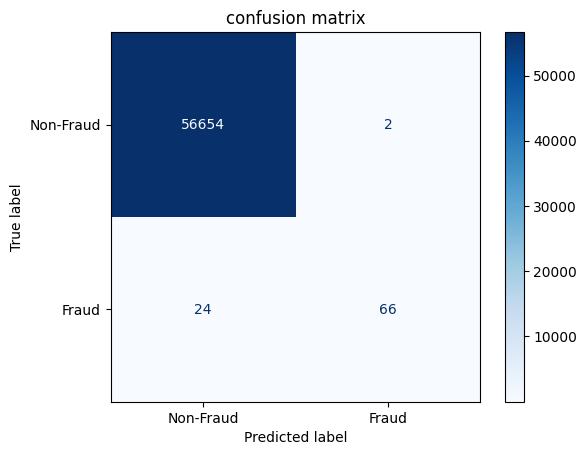

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_mat=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=["Non-Fraud", "Fraud"])
disp.plot(cmap='Blues', values_format='d')
plt.title("confusion matrix")
plt.show()

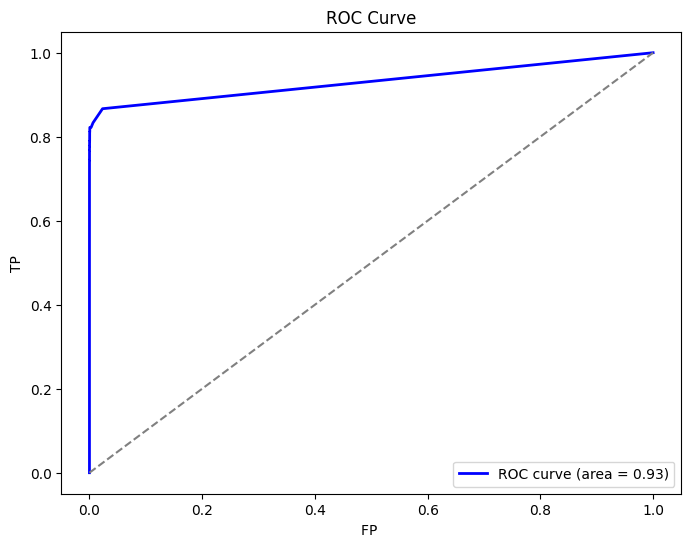

In [47]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
y_prob = rf_classifi.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('FP ')
plt.ylabel('TP')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [48]:
## SVM cClassifier

svm=SVC(kernel='rbf',random_state=42)
svm.fit(X_train,y_train)


SVC(random_state=42)

In [49]:
y_predi=svm.predict(X_test)

accuracy = accuracy_score(y_test, y_predi)
prec = precision_score(y_test, y_predi)
rec = recall_score(y_test, y_predi)
f1 = f1_score(y_test, y_predi)

print("Accuracy:", accuracy)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)




Accuracy: 0.9994360836006062
Precision: 0.9833333333333333
Recall: 0.6555555555555556
F1 Score: 0.7866666666666666


<Figure size 600x600 with 0 Axes>

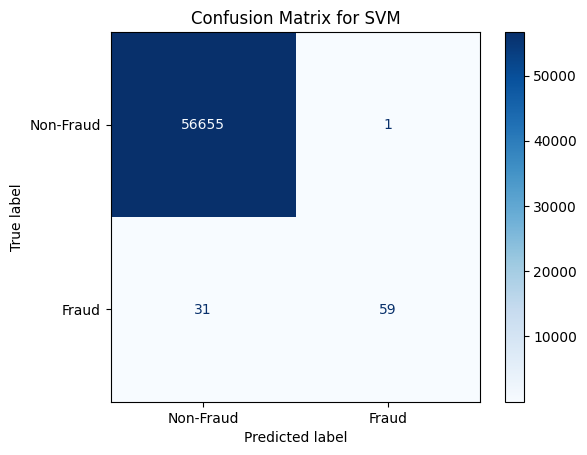

In [50]:
cm = confusion_matrix(y_test, y_predi)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for SVM")
plt.show()

## Deep learning

In [51]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from keras.optimizers import Adam
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler

In [8]:
X=data.drop('Class',axis=1)
y=data['Class']


In [55]:
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train = np.expand_dims(X_train.values, axis=1)
X_test = np.expand_dims(X_test.values, axis=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(y_train.shape[1], activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


/Users/mahesh/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7094/7094 ━━━━━━━━━━━━━━━━━━━━ 4s 472us/step - accuracy: 0.9921 - loss: 0.0499 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 2/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 3s 442us/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 3/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 3s 467us/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9995 - val_loss: 0.0029
Epoch 4/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 3s 442us/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9995 - val_loss: 0.0030
Epoch 5/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 3s 444us/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9995 - val_loss: 0.0027
Epoch 6/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 3s 441us/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.9995 - val_loss: 0.0029
Epoch 7/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 3s 443us/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9995 - val_loss: 0.0035
Epoch 8/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 3s 460us/step - accuracy: 0.9997 - loss: 0.00

In [56]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)



1774/1774 ━━━━━━━━━━━━━━━━━━━━ 1s 257us/step


In [57]:
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9993303492757198
Precision: 0.9993190150620639
Recall: 0.9993303492757198
F1-score: 0.9992467492777144


In [58]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train = np.expand_dims(X_train.values, axis=1)
X_test = np.expand_dims(X_test.values, axis=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [61]:
lstm = Sequential()
lstm.add(LSTM(units=50, return_sequences=True, activation='relu',
              kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1], X_train.shape[2])))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=80, return_sequences=True, activation='relu',
              kernel_regularizer=regularizers.l2(0.01)))
lstm.add(Dropout(0.3))
lstm.add(LSTM(units=120, return_sequences=False, activation='relu',
              kernel_regularizer=regularizers.l2(0.01)))
lstm.add(Dropout(0.4))
lstm.add(Dense(units=y_train.shape[1], activation='softmax'))
lstm.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
lstm.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 1, 50)          │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 1, 80)          │        41,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 80)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           242 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,642 (604.07 KB)

 Trainable params: 154,642 (604.07 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9974 - loss: 0.1409 - val_accuracy: 0.9984 - val_loss: 0.0120
Epoch 2/20
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9985 - loss: 0.0117 - val_accuracy: 0.9984 - val_loss: 0.0120
Epoch 3/20
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9984 - loss: 0.0127 - val_accuracy: 0.9984 - val_loss: 0.0119
Epoch 4/20
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9983 - loss: 0.0131 - val_accuracy: 0.9984 - val_loss: 0.0121
Epoch 5/20
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9983 - loss: 0.0128 - val_accuracy: 0.9984 - val_loss: 0.0118
Epoch 6/20
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9982 - loss: 0.0137 - val_accuracy: 0.9984 - val_loss: 0.0119
Epoch 7/20
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9983 - loss: 0.0131 - val_accuracy: 0.9984 - val_loss: 0.0118
Epoch 8/20
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9984 - loss: 0

In [63]:
y_pred = lstm.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step


In [64]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.998413985126705
Precision: 0.9968304856965883
Recall: 0.998413985126705
F1-score: 0.9976216070499391


/Users/mahesh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat=confusion_matrix(y_true,y_pred_classes)

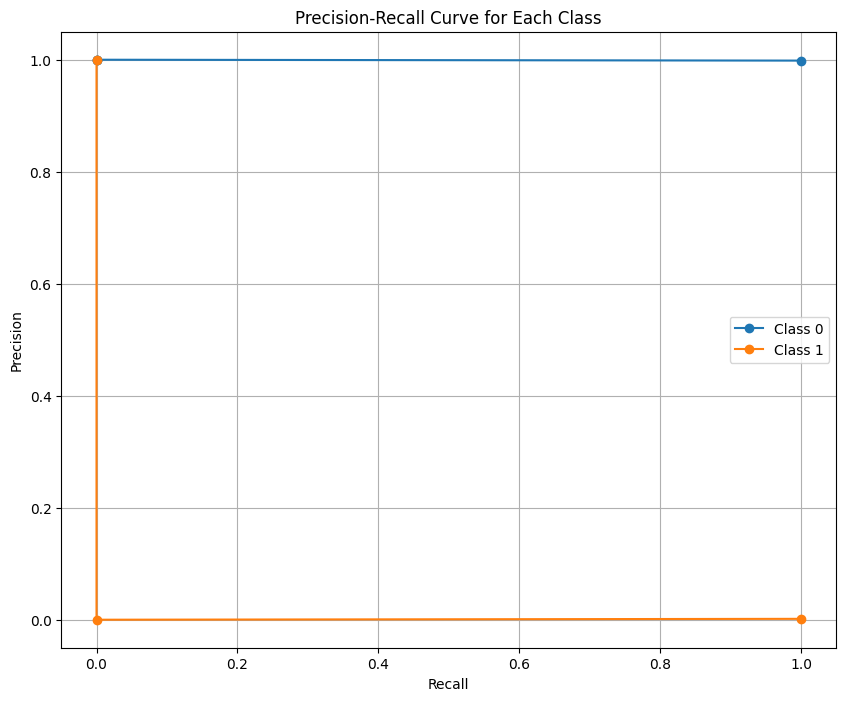

In [66]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for i in range(y_test.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred[:, i])
    plt.plot(recall, precision, marker='o', label=f'Class {i}')

plt.title('Precision-Recall Curve for Each Class')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="best")
plt.grid()
plt.show()


#### undersampling 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


/Users/mahesh/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testing Accuracy: 0.9436619718309859
Precision: 0.9366197183098591
Recall: 0.95
F1 Score: 0.9432624113475178

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       144
           1       0.94      0.95      0.94       140

    accuracy                           0.94       284
   macro avg       0.94      0.94      0.94       284
weighted avg       0.94      0.94      0.94       284

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
Confusion Matrix (Full Dataset):
 [[463  10]
 [ 14 459]]


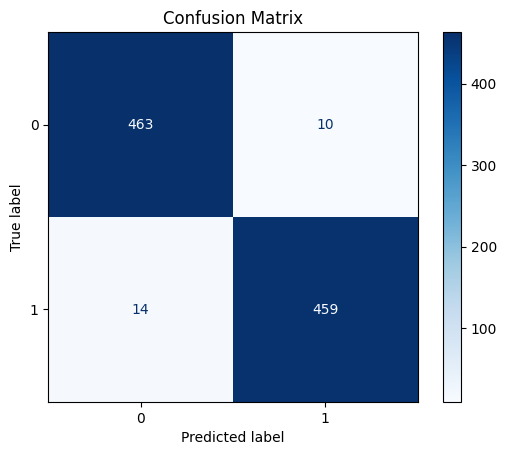

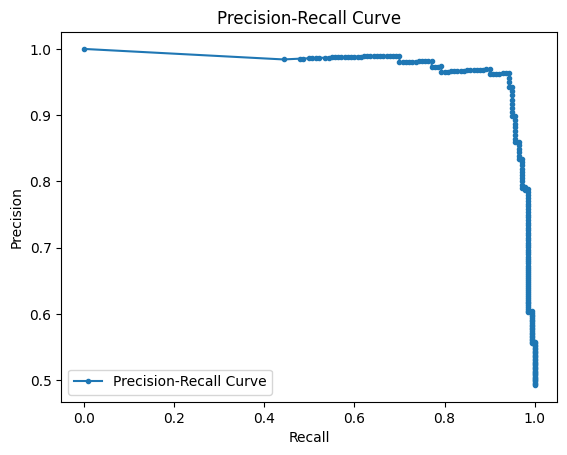

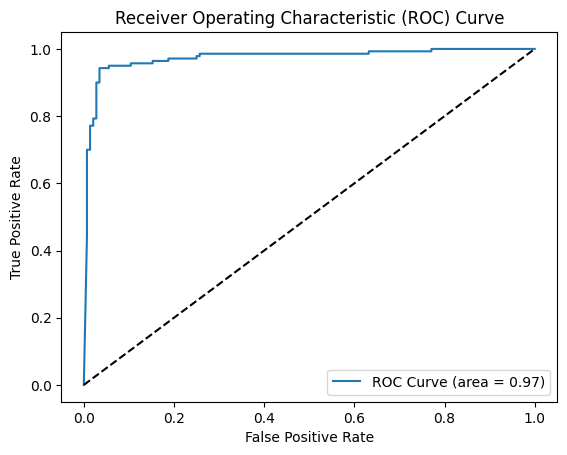

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def sample_data(data):
    data = data.reset_index(drop=True)
    fraud_idx = np.array(data[data.Class == 1].index)
    num_fraud = len(fraud_idx)
    normal_idx = np.array(data[data.Class == 0].index)
    random_normal_idx = np.random.choice(normal_idx, num_fraud, replace=False)
    sampled_idx = np.concatenate([fraud_idx, random_normal_idx])
    sampled_data = data.iloc[sampled_idx, :]
    X_sampled = sampled_data.drop(columns=['Class'])
    y_sampled = sampled_data['Class']
    return X_sampled, y_sampled

def preprocess_data(X_sampled, y_sampled):
    X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test, scaler

def build_model(input_dim):
    model = Sequential()
    model.add(Dense(32, input_dim=input_dim, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def plot_confusion_matrix(cnf_matrix, classes):
    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=classes)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, X_full, y_full, scaler):
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    y_pred_prob = model.predict(X_test).ravel()
    y_pred = (y_pred_prob > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Testing Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    y_pred_full_prob = model.predict(scaler.transform(X_full)).ravel()
    y_pred_full = (y_pred_full_prob > 0.5).astype("int32")
    cnf_matrix = confusion_matrix(y_full, y_pred_full)
    print("Confusion Matrix (Full Dataset):\n", cnf_matrix)
    plot_confusion_matrix(cnf_matrix, classes=[0, 1])
    return y_test, y_pred_prob

def plot_precision_recall_curve(y_test, y_pred_prob):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

def plot_roc_curve(y_test, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()



X_sampled, y_sampled = sample_data(data)
X_train, X_test, y_train, y_test, scaler = preprocess_data(X_sampled, y_sampled)
model = build_model(input_dim=X_train.shape[1])
y_test, y_pred_prob = train_and_evaluate_model(model, X_train, y_train, X_test, y_test, X_sampled, y_sampled, scaler)
plot_precision_recall_curve(y_test, y_pred_prob)
plot_roc_curve(y_test, y_pred_prob)


/Users/mahesh/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testing Accuracy: 0.926056338028169
Precision: 0.8940397350993378
Recall: 0.9642857142857143
F1 Score: 0.9278350515463918

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       144
           1       0.89      0.96      0.93       140

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
Confusion Matrix (Full Dataset):
 [[457  16]
 [ 15 458]]


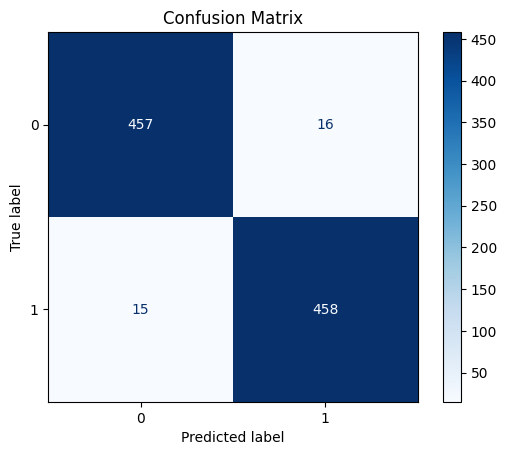

(154103    1
 8803      1
 227680    0
 232390    1
 17262     1
          ..
 281679    0
 128123    0
 106259    1
 153230    1
 111787    0
 Name: Class, Length: 284, dtype: int64,
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.99999404e-01,
        1.00000000e+00, 4.45231587e-01, 2.75805481e-02, 1.00000000e+00,
        1.00000000e+00, 3.61100323e-02, 2.90712804e-01, 1.00000000e+00,
        6.56866375e-03, 9.65918660e-01, 2.10313164e-02, 1.00000000e+00,
        9.77583766e-01, 1.51918652e-02, 3.50279272e-01, 6.81956811e-03,
        3.19318436e-02, 2.35274076e-01, 1.38363078e-01, 9.07786749e-03,
        9.99946713e-01, 9.99999881e-01, 2.12579151e-03, 3.01158488e-01,
        1.00000000e+00, 1.00000000e+00, 3.54448520e-02, 2.79639643e-02,
        3.38893454e-03, 9.99596059e-01, 9.99995649e-01, 7.02410052e-03,
        1.00000000e+00, 1.00000000e+00, 9.99205053e-01, 3.40281310e-03,
        9.18903446e-04, 1.00000000e+00, 5.84083609e-03, 9.99994934e-01,
        1.62484106e-02, 

In [28]:

X_full = X_sampled  
y_full = y_sampled  
model = build_model(X_full.shape[1])
train_and_evaluate_model(model, X_train, y_train, X_test, y_test, X_full, y_full,scaler)
